In [28]:
import pandas as pd
import numpy as np
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("Train shape : ",train.shape)
print("Test shape : ",test.shape)

Train shape :  (1306122, 3)
Test shape :  (56370, 2)


In [3]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
train["target"].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [5]:
print('Average word length of questions in train is {0:.0f}.'.format(np.mean(train['question_text'].apply(lambda x: len(x.split())))))
print('Average word length of questions in test is {0:.0f}.'.format(np.mean(test['question_text'].apply(lambda x: len(x.split())))))

Average word length of questions in train is 13.
Average word length of questions in test is 13.


In [6]:
print('Max word length of questions in train is {0:.0f}.'.format(np.max(train['question_text'].apply(lambda x: len(x.split())))))
print('Max word length of questions in test is {0:.0f}.'.format(np.max(test['question_text'].apply(lambda x: len(x.split())))))

Max word length of questions in train is 134.
Max word length of questions in test is 87.


In [7]:
print('Average character length of questions in train is {0:.0f}.'.format(np.mean(train['question_text'].apply(lambda x: len(x)))))
print('Average character length of questions in test is {0:.0f}.'.format(np.mean(test['question_text'].apply(lambda x: len(x)))))

Average character length of questions in train is 71.
Average character length of questions in test is 70.


In [8]:
df_new = pd.concat([train, test], sort=False)

In [9]:
df_new.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0


In [26]:

max_features = 90000
tk = Tokenizer(lower = False, filters='', num_words=max_features)
full_text = list(train['question_text'].values) + list(test['question_text'].values)
tk.fit_on_texts(full_text)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
train_tokenized = tk.texts_to_sequences(train['question_text'].fillna('missing'))
test_tokenized = tk.texts_to_sequences(test['question_text'].fillna('missing'))

In [30]:
max_len = 70
X = pad_sequences(train_tokenized, maxlen = max_len)

In [31]:
X[1:,]

array([[    0,     0,     0, ...,    10,    45,  6781],
       [    0,     0,     0, ...,   318,   685, 12309],
       [    0,     0,     0, ...,   124,     1, 87945],
       ...,
       [    0,     0,     0, ..., 10184, 18637, 15260],
       [    0,     0,     0, ...,    42,  4670,  2161],
       [    0,     0,     0, ...,    10,     4, 78938]])

Text(0.5,1,'Distribution of question text length in characters')

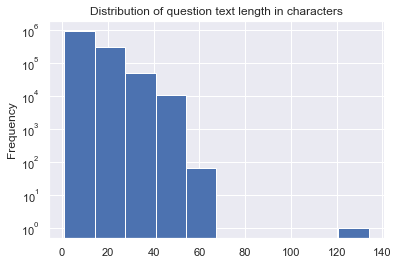

In [32]:
train['question_text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Distribution of question text length in characters')

In [10]:
STOP_WORDS = nltk.corpus.stopwords.words()
import re

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [11]:
for i in ['question_text']:
    df_new['clean_question_text'] = df_new[i].apply(clean_sentence)

In [12]:
df_new.head()

,qid,question_text,target,clean_question_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0,quebec nationalists see province nation 1960s
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0,adopted would encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0,otto guericke used magdeburg hemispheres
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0,convert montra helicon mountain bike changing ...


In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize

tokenized = df_new['clean_question_text'].apply(word_tokenize)
tokenized.head()

0    [quebec, nationalists, see, province, nation, ...
1     [adopted, would, encourage, people, adopt, shop]
2    [velocity, affect, time, velocity, affect, spa...
3       [otto, guericke, used, magdeburg, hemispheres]
4    [convert, montra, helicon, mountain, bike, cha...
Name: clean_question_text, dtype: object

In [14]:
tokenized_df = pd.DataFrame(tokenized).reset_index()
tokenized_df.columns = ['qid', 'clean_question_text']
tokenized_df.head()

,qid,clean_question_text
0,0,"[quebec, nationalists, see, province, nation, ..."
1,1,"[adopted, would, encourage, people, adopt, shop]"
2,2,"[velocity, affect, time, velocity, affect, spa..."
3,3,"[otto, guericke, used, magdeburg, hemispheres]"
4,4,"[convert, montra, helicon, mountain, bike, cha..."


In [15]:
from gensim.models import Word2Vec

word2Vec = Word2Vec(tokenized,min_count=1,size=100)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
words = list(word2Vec.wv.vocab)
print(words[0:20])

['quebec', 'nationalists', 'see', 'province', 'nation', '1960s', 'adopted', 'would', 'encourage', 'people', 'adopt', 'shop', 'velocity', 'affect', 'time', 'space', 'geometry', 'otto', 'guericke', 'used']


In [17]:
word2Vec.wv.most_similar('quebec')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('belgium', 0.8664677739143372),
 ('scotland', 0.8599721193313599),
 ('denmark', 0.8592960834503174),
 ('switzerland', 0.8344236612319946),
 ('hungary', 0.8332367539405823),
 ('austria', 0.8322784900665283),
 ('ireland', 0.8263214826583862),
 ('spain', 0.8242508172988892),
 ('finland', 0.8203701376914978),
 ('netherlands', 0.8190566301345825)]

In [18]:
# Visualize word embedding
vector_list = [word2Vec[word] for word in words if word in word2Vec.wv.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in word2Vec.wv.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [19]:
# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
quebec,0.128352,-0.679280,-0.162124,0.080988,0.788859,-0.547415,-0.102292,0.289764,0.109098,0.250866,...,-1.021968,-0.225764,-1.029217,0.868898,-0.517566,-0.114750,-0.259822,0.564306,0.214770,0.772082
nationalists,0.166599,-0.178935,0.755788,0.299775,0.792619,-0.592785,-0.550401,-0.553713,-0.258244,-0.954006,...,-1.289595,0.202745,-0.273554,0.562170,-0.311546,0.553270,-1.125734,1.418299,-1.360123,1.072019
see,-2.881574,0.896176,1.412401,-2.004537,-0.068354,0.126836,-1.012004,0.931406,0.490913,-0.341769,...,0.722105,-1.479677,-0.494766,1.816635,-0.433234,-0.723503,-0.998731,-0.122105,0.228230,-1.604438


In [20]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


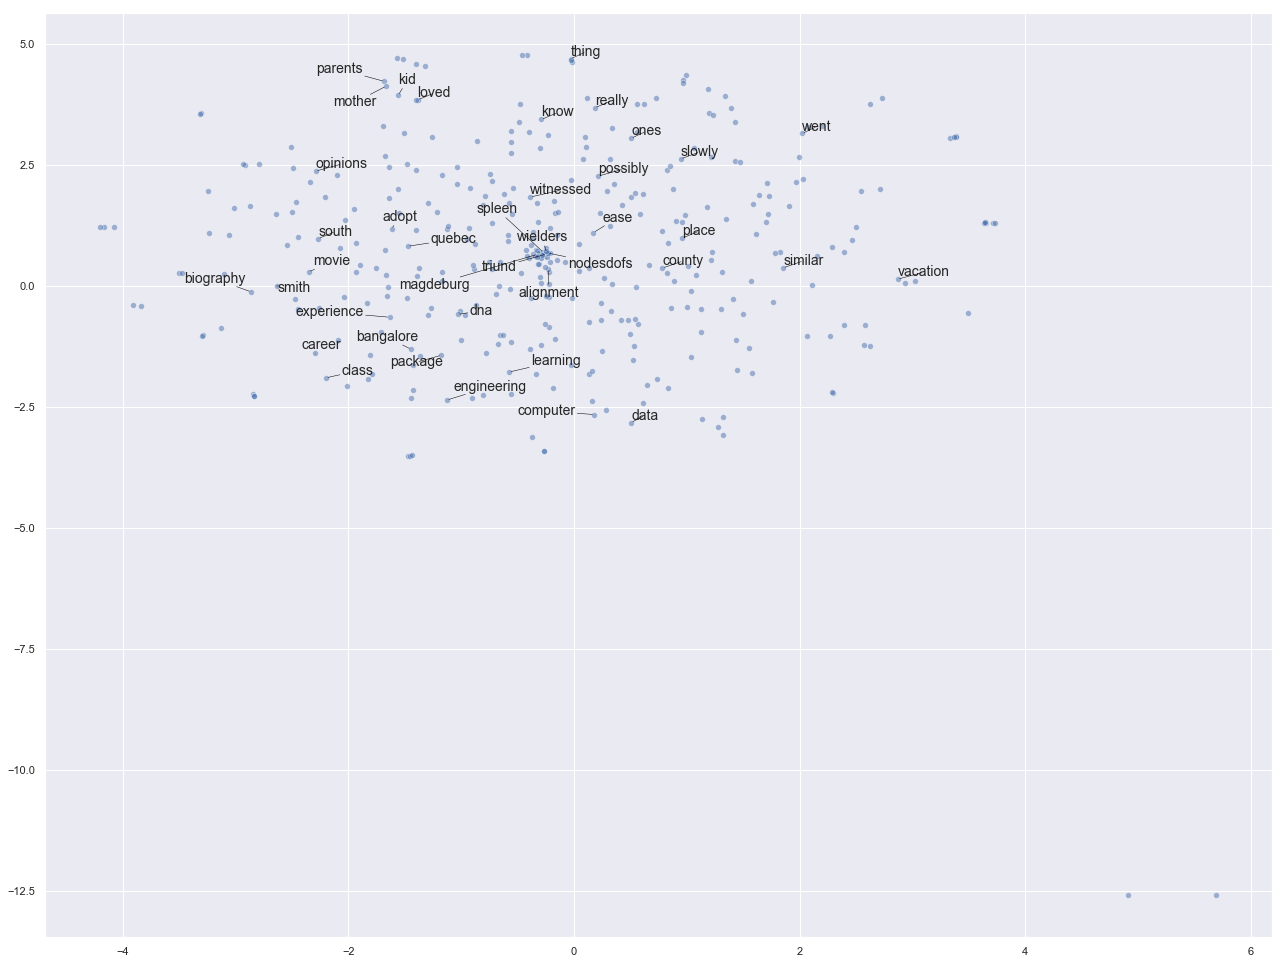

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (22, 17))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()
fig.savefig('word_embedding_visual.png')